# Transparent filament

<font color='blue'>The main piece of code is summarized in the last section.</font>

In [1]:
import numpy as np
import cv2

import matplotlib.pyplot as plt
%matplotlib inline
plt.ion()

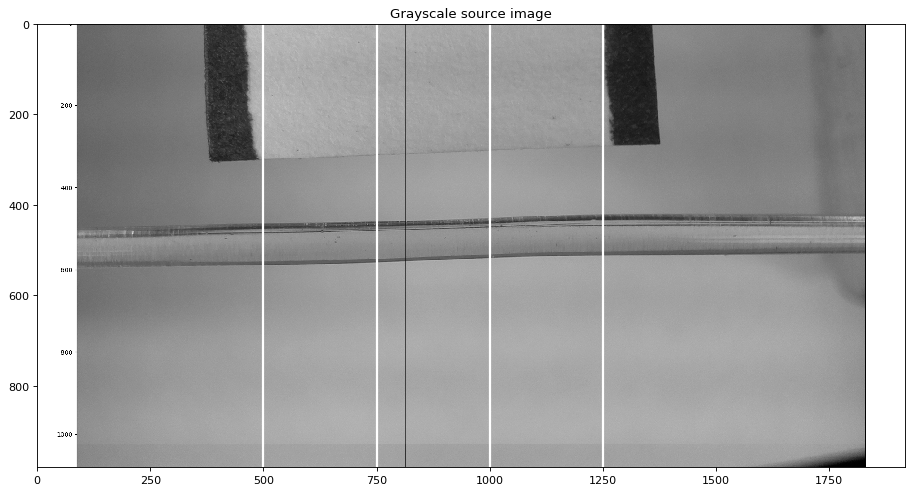

In [2]:
cap  = cv2.imread('transparent_filament.png') #BGR
capg = cv2.cvtColor(cap, cv2.COLOR_BGR2GRAY)  #Gray

fig = plt.figure(figsize=(14, 12), dpi=80)
plt.imshow(capg, cmap='gray')

# four manually selected slices
plt.axvline(x=500,linewidth=2,c='w')  # @500
plt.axvline(x=750,linewidth=2,c='w')  # @750
plt.axvline(x=1000,linewidth=2,c='w') # @1000
plt.axvline(x=1250,linewidth=2,c='w') # @1250
plt.title('Grayscale source image')
plt.show()

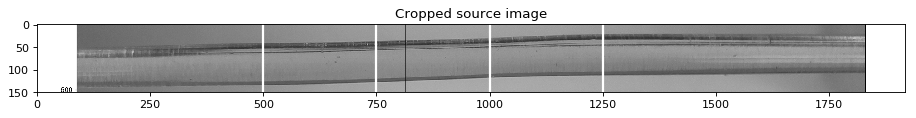

In [3]:
# cropped source image
capg = capg[400:550,:]

fig = plt.figure(figsize=(14, 12), dpi=80)

plt.imshow(capg, cmap='gray')
plt.axvline(x=500,linewidth=2,c='w')
plt.axvline(x=750,linewidth=2,c='w')
plt.axvline(x=1000,linewidth=2,c='w')
plt.axvline(x=1250,linewidth=2,c='w')
plt.title('Cropped source image')
plt.show()

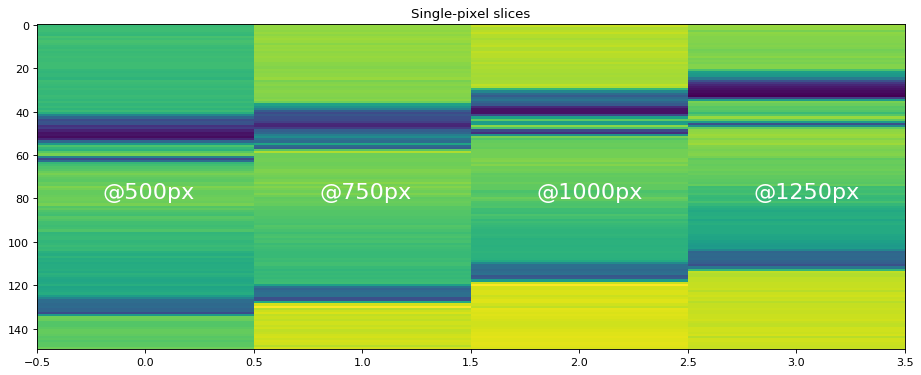

In [4]:
# single-pixel slices
img = np.concatenate((capg[:,499:500],capg[:,749:750],\
                      capg[:,999:1000],capg[:,1249:1250]),axis=1)

fig = plt.figure(figsize=(14, 10), dpi=80)
ax = fig.subplots()
plt.imshow(img)
ax.set_aspect(1e-2)
ax.text(0-0.2,80,'@500px',fontsize=20,color='w')
ax.text(1-0.2,80,'@750px',fontsize=20,color='w')
ax.text(2-0.2,80,'@1000px',fontsize=20,color='w')
ax.text(3-0.2,80,'@1250px',fontsize=20,color='w')
plt.title('Single-pixel slices')
plt.show()

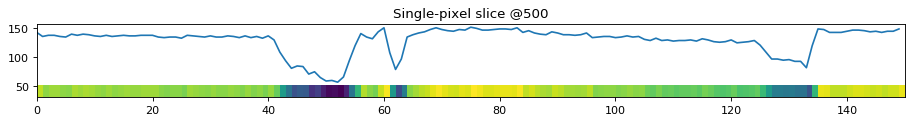

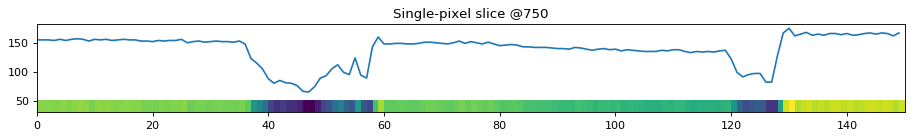

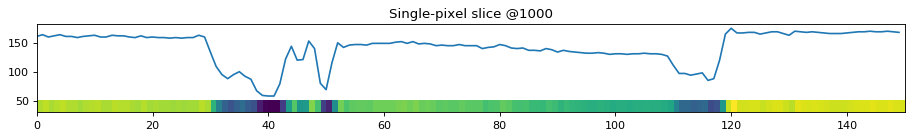

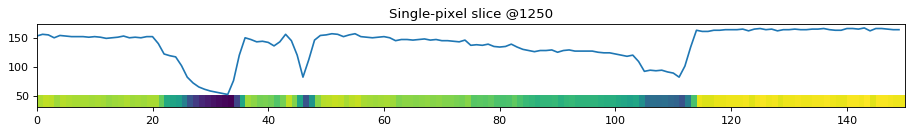

In [5]:
# rotate slices and plot grayscale values

fig, ax = plt.subplots(figsize=(14,10), dpi=80)
ax.imshow(np.transpose(capg[:,499:500]), extent=[0,150,30,50])
ax.plot(capg[:,499:500])
ax.set_aspect(.1)
plt.title('Single-pixel slice @500')
plt.show()

fig, ax = plt.subplots(figsize=(14,10), dpi=80)
ax.imshow(np.transpose(capg[:,749:750]), extent=[0,150,30,50])
ax.plot(capg[:,749:750])
ax.set_aspect(.1)
plt.title('Single-pixel slice @750')
plt.show()

fig, ax = plt.subplots(figsize=(14,10), dpi=80)
ax.imshow(np.transpose(capg[:,999:1000]), extent=[0,150,30,50])
ax.plot(capg[:,999:1000])
ax.set_aspect(.1)
plt.title('Single-pixel slice @1000')
plt.show()

fig, ax = plt.subplots(figsize=(14,10), dpi=80)
ax.imshow(np.transpose(capg[:,1249:1250]), extent=[0,150,30,50])
ax.plot(capg[:,1249:1250])
ax.set_aspect(.1)
plt.title('Single-pixel slice @1250')
plt.show()

In [6]:
# threshold analysis
y_threshold = 120 # manually chosen parameter

y_threshold_array = y_threshold*np.ones((len(capg[:,499:500]), 1))


----------------------------------------------------
Intersection indices = [ 41  55  60  63 124 125 134]
----------------------------------------------------
First detected edge = 41 px
Last detected edge = 134 px
----------------------------------------------------
Diameter = 93 px
----------------------------------------------------


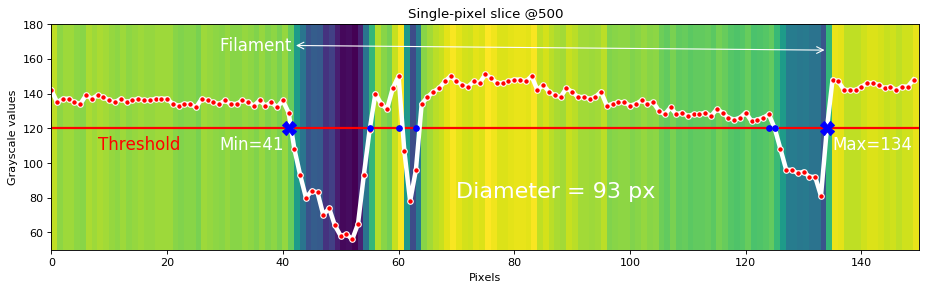

In [7]:
# find intersections @ 500
idx = np.argwhere(np.diff(np.sign(np.squeeze(y_threshold_array)-\
                                  np.squeeze(capg[:,499:500])))).flatten()
print('----------------------------------------------------')
print('Intersection indices = {}'.format(idx))
print('----------------------------------------------------')
# calculate diameter in pixels
print('First detected edge = {} px'.format(np.min(idx)))
print('Last detected edge = {} px'.format(np.max(idx)))
print('----------------------------------------------------')
diameter_px = np.max(idx) - np.min(idx)
print('Diameter = {} px'.format(diameter_px))
print('----------------------------------------------------')

fig, ax = plt.subplots(figsize=(14,10), dpi=80)
ax.imshow(np.transpose(capg[:,499:500]), extent=[0,150,50,180], cmap='viridis')
ax.axhline(y=y_threshold,linewidth=2, color='r')
ax.text(8,y_threshold-12,'Threshold',fontsize=15,color='r')
ax.plot(capg[:,499:500],'.-',markersize=10, markerfacecolor='r', linewidth=4, color='w')
ax.set_aspect(.3)
ax.annotate("Filament", xy=(134,165), xytext=(29,165), fontsize=15, color='w',
            arrowprops=dict(arrowstyle="<->", color='w'))
ax.set_xlabel('Pixels')
ax.set_ylabel('Grayscale values')
ax.set_title('Single-pixel slice @500')

ax.plot(idx,np.squeeze(y_threshold_array)[idx],'bo',markersize=5) # all intersection points
ax.plot(np.min(idx),np.squeeze(y_threshold_array)[np.min(idx)],'bX',markersize=12) # min
ax.plot(np.max(idx),np.squeeze(y_threshold_array)[np.max(idx)],'bX',markersize=12) # max
ax.text(np.min(idx)-12,y_threshold-12,'Min='+str(np.min(idx)),fontsize=15,color='w')
ax.text(np.max(idx)+1,y_threshold-12,'Max='+str(np.max(idx)),fontsize=15,color='w')
ax.text(70,80,'Diameter = '+str(diameter_px)+' px',fontsize=20,color='w')
plt.show()


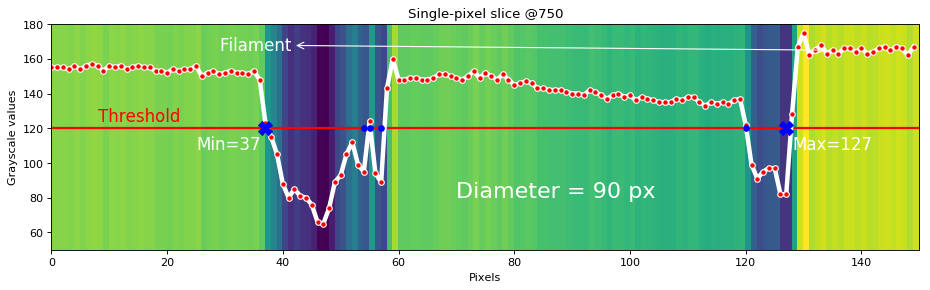

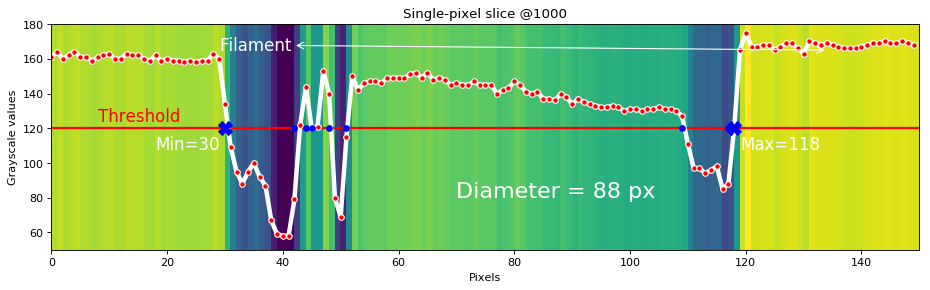

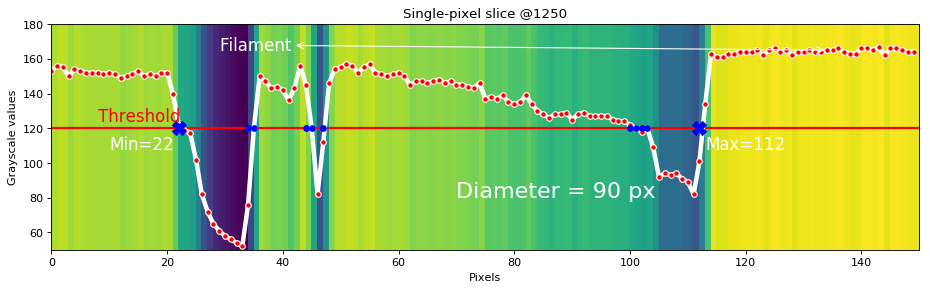

In [8]:
# find intersections @750
idx = np.argwhere(np.diff(np.sign(np.squeeze(y_threshold_array)-\
                                  np.squeeze(capg[:,749:750])))).flatten()
diameter_px = np.max(idx) - np.min(idx)

fig, ax = plt.subplots(figsize=(14,10), dpi=80)
ax.imshow(np.transpose(capg[:,749:750]), extent=[0,150,50,180], cmap='viridis')
ax.axhline(y=y_threshold,linewidth=2, color='r')
ax.text(8,y_threshold+4,'Threshold',fontsize=15,color='r')
ax.plot(capg[:,749:750],'.-',markersize=10, markerfacecolor='r', linewidth=4, color='w')
ax.set_aspect(.3)
ax.annotate("Filament", xy=(134,165), xytext=(29,165), fontsize=15, color='w',
            arrowprops=dict(arrowstyle="<->", color='w'))
ax.set_xlabel('Pixels')
ax.set_ylabel('Grayscale values')
ax.set_title('Single-pixel slice @750')

ax.plot(idx,np.squeeze(y_threshold_array)[idx],'bo',markersize=5) # all intersection points
ax.plot(np.min(idx),np.squeeze(y_threshold_array)[np.min(idx)],'bX',markersize=12) # min
ax.plot(np.max(idx),np.squeeze(y_threshold_array)[np.max(idx)],'bX',markersize=12) # max
ax.text(np.min(idx)-12,y_threshold-12,'Min='+str(np.min(idx)),fontsize=15,color='w')
ax.text(np.max(idx)+1,y_threshold-12,'Max='+str(np.max(idx)),fontsize=15,color='w')
ax.text(70,80,'Diameter = '+str(diameter_px)+' px',fontsize=20,color='w')
plt.show()



# find intersections @1000
idx = np.argwhere(np.diff(np.sign(np.squeeze(y_threshold_array)-\
                                  np.squeeze(capg[:,999:1000])))).flatten()
diameter_px = np.max(idx) - np.min(idx)

fig, ax = plt.subplots(figsize=(14,10), dpi=80)
ax.imshow(np.transpose(capg[:,999:1000]), extent=[0,150,50,180], cmap='viridis')
ax.axhline(y=y_threshold,linewidth=2, color='r')
ax.text(8,y_threshold+4,'Threshold',fontsize=15,color='r')
ax.plot(capg[:,999:1000],'.-',markersize=10, markerfacecolor='r', linewidth=4, color='w')
ax.set_aspect(.3)
ax.annotate("Filament", xy=(134,165), xytext=(29,165), fontsize=15, color='w',
            arrowprops=dict(arrowstyle="<->", color='w'))
ax.set_xlabel('Pixels')
ax.set_ylabel('Grayscale values')
ax.set_title('Single-pixel slice @1000')

ax.plot(idx,np.squeeze(y_threshold_array)[idx],'bo',markersize=5) # all intersection points
ax.plot(np.min(idx),np.squeeze(y_threshold_array)[np.min(idx)],'bX',markersize=12) # min
ax.plot(np.max(idx),np.squeeze(y_threshold_array)[np.max(idx)],'bX',markersize=12) # max
ax.text(np.min(idx)-12,y_threshold-12,'Min='+str(np.min(idx)),fontsize=15,color='w')
ax.text(np.max(idx)+1,y_threshold-12,'Max='+str(np.max(idx)),fontsize=15,color='w')
ax.text(70,80,'Diameter = '+str(diameter_px)+' px',fontsize=20,color='w')
plt.show()



# find intersections @1250
idx = np.argwhere(np.diff(np.sign(np.squeeze(y_threshold_array)-\
                                  np.squeeze(capg[:,1249:1250])))).flatten()
diameter_px = np.max(idx) - np.min(idx)

fig, ax = plt.subplots(figsize=(14,10), dpi=80)
ax.imshow(np.transpose(capg[:,1249:1250]), extent=[0,150,50,180], cmap='viridis')
ax.axhline(y=y_threshold,linewidth=2, color='r')
ax.text(8,y_threshold+4,'Threshold',fontsize=15,color='r')
ax.plot(capg[:,1249:1250],'.-',markersize=10, markerfacecolor='r', linewidth=4, color='w')
ax.set_aspect(.3)
ax.annotate("Filament", xy=(134,165), xytext=(29,165), fontsize=15, color='w',
            arrowprops=dict(arrowstyle="<->", color='w'))
ax.set_xlabel('Pixels')
ax.set_ylabel('Grayscale values')
ax.set_title('Single-pixel slice @1250')

ax.plot(idx,np.squeeze(y_threshold_array)[idx],'bo',markersize=5) # all intersection points
ax.plot(np.min(idx),np.squeeze(y_threshold_array)[np.min(idx)],'bX',markersize=12) # min
ax.plot(np.max(idx),np.squeeze(y_threshold_array)[np.max(idx)],'bX',markersize=12) # max
ax.text(np.min(idx)-12,y_threshold-12,'Min='+str(np.min(idx)),fontsize=15,color='w')
ax.text(np.max(idx)+1,y_threshold-12,'Max='+str(np.max(idx)),fontsize=15,color='w')
ax.text(70,80,'Diameter = '+str(diameter_px)+' px',fontsize=20,color='w')
plt.show()

# Summary: the main code 

### Input

In [9]:
import numpy as np
import cv2

cap  = cv2.imread('transparent_filament.png') #source image

crop_x_upper = 550 # pixels
crop_x_lower = 400 # pixels

y_slice = 500 # pixels
y_threshold = 130 # grayscale threshold
scaling_factor = 0.018547945205479453 # Width of 1 pixel (mm)
calibration_adjustment = 3.0 # pixels

### All calculations are here

In [10]:
# create cropped grayscale image
capg = cv2.cvtColor(cap[crop_x_lower:crop_x_upper,:], cv2.COLOR_BGR2GRAY)

# find intersections between the actual grayscale profile and the desired threshold
y_threshold_array = y_threshold*np.ones((len(capg[:,y_slice-1:y_slice]), 1))
idx = np.argwhere(np.diff(np.sign(np.squeeze(y_threshold_array)-\
                                  np.squeeze(capg[:,y_slice-1:y_slice])))).flatten()


### Output

In [11]:
# display/print results

print('----------------------------------------------------')
print('Intersection indices = {}'.format(idx))
print('----------------------------------------------------')
# calculate diameter in pixels
print('First detected edge = {} px'.format(np.min(idx)))
print('Last detected edge = {} px'.format(np.max(idx)))
print('----------------------------------------------------')
diameter_px = np.max(idx)-np.min(idx)
print('Diameter = {} px'.format(diameter_px))
print('Diameter = {} mm'.format(np.round((diameter_px+\
                                          calibration_adjustment)*scaling_factor,2)))
print('----------------------------------------------------')

----------------------------------------------------
Intersection indices = [ 40  55  60  63 104 105 106 107 114 115 134]
----------------------------------------------------
First detected edge = 40 px
Last detected edge = 134 px
----------------------------------------------------
Diameter = 94 px
Diameter = 1.8 mm
----------------------------------------------------


# Optional: multiple measurements per frame

In [12]:
import numpy as np
import cv2

cap  = cv2.imread('transparent_filament.png') #source image

crop_x_upper = 550 # pixels
crop_x_lower = 400 # pixels

y_slice = 500 # initial slicer position
y_threshold = 130 # grayscale threshold
number_of_measurements = 300
scaling_factor = 0.018547945205479453 # Width of 1 pixel (mm)
calibration_adjustment = 4.0 # pixels
diameter_mm = [] # allocate for the array of measurements

In [13]:
capg = cv2.cvtColor(cap[crop_x_lower:crop_x_upper,:], cv2.COLOR_BGR2GRAY)
y_threshold_array = y_threshold*np.ones((len(capg[:,y_slice-1:y_slice]), 1))

for i in range(number_of_measurements):
    idx = np.argwhere(np.diff(np.sign(np.squeeze(y_threshold_array)-\
                                      np.squeeze(capg[:,y_slice-1+i:y_slice+i])))).flatten()
    diameter_mm.append(scaling_factor*(np.max(idx)-np.min(idx)+calibration_adjustment))



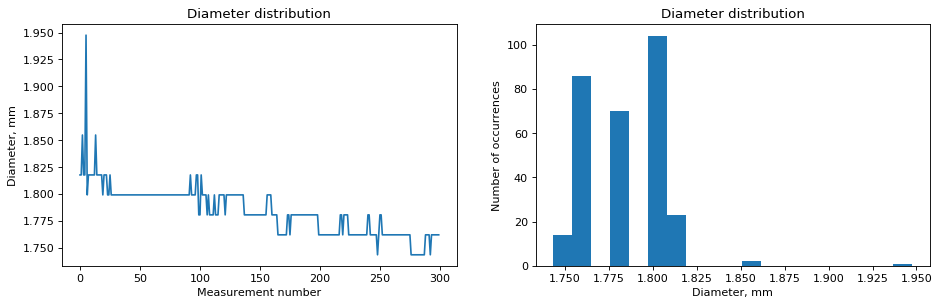

In [14]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14, 4), dpi=80)
plt.subplot(1,2,1)
plt.plot(diameter_mm)
plt.xlabel('Measurement number'),plt.ylabel('Diameter, mm')
plt.title("Diameter distribution")
plt.subplot(1,2,2)
plt.hist(diameter_mm, bins='auto')
plt.xlabel('Diameter, mm'),plt.ylabel('Number of occurrences')
plt.title("Diameter distribution")
plt.show()